# STA 220 Assignment 1
# Jake Tierney, Student ID: 913235409

Due __January 26, 2024__ by __11:59pm__. Submit your work by uploading it to Gradescope through Canvas.

Instructions:

1. Provide your solutions in new cells following each exercise description. Create as many new cells as necessary. Use code cells for your Python scripts and Markdown cells for explanatory text or answers to non-coding questions. Answer all textual questions in complete sentences.
2. The use of assistive tools is permitted, but must be indicated. You will be graded on you proficiency in coding. Produce high quality code by adhering to proper programming principles. 
3. Export the .jpynb as .pdf and submit it on Gradescope in time. To facilitate grading, indicate the area of the solution on the submission. Submissions without indication will be marked down. No late submissions accepted. 
4. If test cases are given, your solution must be in the same format. 
5. The total number of points is 10. 

__Exercise 1__

Answer the following questions by querying [Lahman Baseball Database](http://seanlahman.com/). The 2019 version together with the description (`readme2019.txt`) are on Piazza. Answer the following questions. 

The purpose of this assignment is to practice accessing and analyzing data in a database. For full credit for (a) and (b), query the correct table with `pandas.read_sql` and a single SQL query. Unless otherwise specified, return in the same format of the test case. 

__(a, i)__ Which pitcher has the second most [home runs allowed](https://en.wikipedia.org/wiki/Home_runs_allowed) in the American League? __(ii)__ Which pitcher has the worst home runs allowed per game ratio? 

In [1]:
# Excercise 1, Problem a

# (i) Which pitcher has the second most home runs allowed in the American League?

# Importing numpy, pandas, and sqlite3
import numpy as np
import pandas as pd
import sqlite3 as sql

# Connecting to Lahman database
lahmandb = sql.connect("/Users/Jake/Desktop/STA_220/HW1/lahmansbaseballdb.sqlite")

# Most home runs allowed in the American League
result1 = pd.read_sql("""SELECT pitching.playerID, nameFirst, nameLast, SUM(HR) AS hra 
                        FROM (pitching LEFT JOIN people ON pitching.playerID = people.playerID)
                        WHERE lgID = 'AL' GROUP BY pitching.playerID ORDER BY hra DESC
                        """, lahmandb).iloc[0]

print(result1['nameFirst'] + " " + result1['nameLast'] + " (" + str(result1["hra"]) + ")")

Frank Tanana (422)


In [2]:
# Second home runs allowed in the American League
result2 = pd.read_sql("""SELECT pitching.playerID, nameFirst, nameLast, SUM(HR) AS hra 
                        FROM (pitching LEFT JOIN people ON pitching.playerID = people.playerID)
                        WHERE lgID = 'AL' GROUP BY pitching.playerID ORDER BY hra DESC
                        """, lahmandb).iloc[1]

print("SOLUTION: " + result2['nameFirst'] + " " + result2['nameLast'] + " (" + str(result2["hra"]) + ")")

SOLUTION: Tim Wakefield (401)


As we can see above, Tim Wakefield has the second most home runs allowed in the American League in this database, with 401 home runs allowed in the American League.

In [3]:
# (ii) Which pitcher has the worst home runs allowed per game ratio?
worst_ratio = pd.read_sql("""SELECT * FROM (SELECT pitching.playerID, nameFirst, nameLast, SUM(HR) AS hra, SUM(G) AS total_games,
                        SUM(ROUND(HR, 3))/SUM(G) AS hra_per_g, pitching.lgID
                        FROM (pitching LEFT JOIN people ON pitching.playerID = people.playerID)
                        WHERE pitching.lgID = "AL"
                        GROUP BY pitching.playerID ORDER BY hra_per_g DESC, total_games DESC);
                        """, lahmandb).iloc[0]
print("SOLUTION: " + worst_ratio['nameFirst'] + " " + worst_ratio['nameLast'] + " (" + str(worst_ratio["hra_per_g"]) + ")")

SOLUTION: Bob Malloy (3.0)


While multiple American League pitchers allowed 3 home runs in a single game played, Bob Malloy had the same home runs allowed per game ratio over the course of two games played, and so he has the worst home runs allowed per game ratio in American League history.

__(b, i)__ Amongst all players in the American League that have passed, report their average lifespan in full years. __(ii)__ Return the six schools with most hall-of-fame alumni. __(iii)__ What fraction of managers have not been professional players?  

In [4]:
# Excercise 1, Problem b

# (i) Amongst all players in the American League that have passed, report their average lifespan in full years.

# Printing the average lifespan for passed players in the American League
avgAge = pd.read_sql("""SELECT CAST(AVG(death_age) AS INTEGER) FROM
                (SELECT DISTINCT appearances.playerID, lgID, birth_date, death_date,
                (JULIANDAY(death_date) - JULIANDAY(birth_date))*1.0/365 AS death_age
                FROM (appearances LEFT JOIN people ON appearances.playerID = people.playerID)
                WHERE death_date != "None" AND lgID = "AL");
                        """, lahmandb).iloc[0, 0]

print("SOLUTION: " + str(avgAge))

SOLUTION: 70


The average age, in full years, at the time of passing for all AL players in the database is 70 years.

In [5]:
# (ii) Return the six schools with most hall-of-fame alumni.

# Printing the six schools with the most hall-of-fame alumni.
hofschools = pd.read_sql("""SELECT name_full, CAST(COUNT(name_full) AS text) AS numhofers
                FROM (SELECT DISTINCT collegeplaying.playerID, collegeplaying.schoolID, name_full, halloffame.yearid
                FROM collegeplaying JOIN schools ON collegeplaying.schoolID = schools.schoolID
                JOIN halloffame ON collegeplaying.playerID = halloffame.playerID
                WHERE inducted = "Y") GROUP BY name_full ORDER BY numhofers DESC;
                        """, lahmandb)

print("SOLUTION: " + "The six schools with the most Hall of Fame alumni are:")
print(hofschools.name_full[0] + ": " + hofschools.numhofers[0])
print(hofschools.name_full[1] + ": " + hofschools.numhofers[1])
print(hofschools.name_full[2] + ": " + hofschools.numhofers[2])
print(hofschools.name_full[3] + ": " + hofschools.numhofers[3])
print(hofschools.name_full[4] + ": " + hofschools.numhofers[4])
print(hofschools.name_full[5] + ": " + hofschools.numhofers[5])
print(hofschools.name_full[6] + ": " + hofschools.numhofers[6])
print(hofschools.name_full[7] + ": " + hofschools.numhofers[7])

SOLUTION: The six schools with the most Hall of Fame alumni are:
University of Southern California: 3
University of Minnesota: 2
University of Michigan: 2
University of Cincinnati: 2
St. Bonaventure University: 2
San Diego State University: 2
Miami-Dade College, North Campus: 2
Columbia University: 2


In [6]:
# (iii) What fraction of managers have not been professional players?

# Printing the proportion of MLB managers who never played in MLB
mgrProp = pd.read_sql("""SELECT COUNT(playerID) AS mgr, COUNT(G_all) AS plyrmgr,
                COUNT(playerID) - COUNT(G_all)  AS nonplyrmgr,
                (ROUND(COUNT(playerID), 4) - ROUND(COUNT(G_all), 4))/ROUND(COUNT(playerID), 4) AS pct
                FROM (SELECT managers.playerID, G_all FROM managers LEFT JOIN appearances
                ON managers.playerID = appearances.playerID
                GROUP BY managers.playerID);
                        """, lahmandb).iloc[0, 3]
print("SOLUTION: " + str(mgrProp))

SOLUTION: 0.17507002801120447


We can see above that the fraction of managers that have not been professional MLB players is roughly 0.175, or 7/40.

__(c)__ Create a world map with a color gradient corresponding to the log-number of players per country in the data set. Use `pandas.read_html` to retrieve the ISO codes from [wikipedia](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes), and merge those records as good as you can. Match no more than ten countries to their ISOs manually. 

Text(0.5, 1.0, 'Log-Frequency of MLB Players by Country')

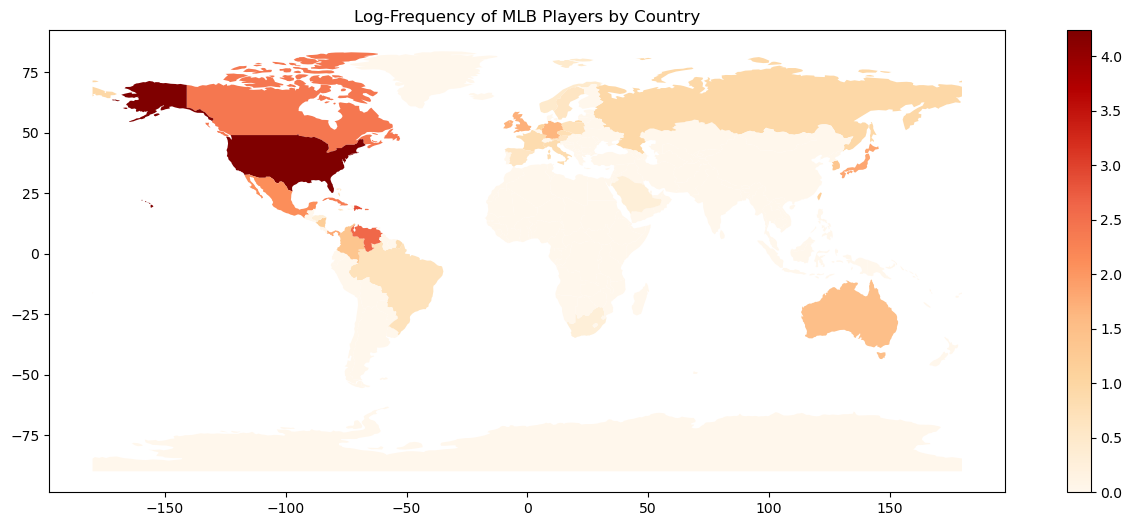

In [7]:
# Excercise 1, Problem c

# Create a world map with a color gradient corresponding to the log-number of players per country in the data set.

# Loading packages and libraries needed for this problem
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Creating DF of log number of players by country
logplyrs = pd.read_sql("""SELECT LOG(COUNT(playerID)) as numplyrs, birthCountry AS countryName
                FROM (SELECT playerID, birthCountry FROM people) WHERE birthCountry != "None" AND birthCountry != "At Sea"
                GROUP BY birthCountry ORDER BY numplyrs DESC;
                        """, lahmandb)

# Pulling country ISO codes from Wikipedia
countrycodes = pd.read_html("https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes")[0]
countrycodes = countrycodes.iloc[1:271, [0, 4]]
countrycodes.rename(
    columns={"Country name[5]": "countryName", "A-3 [5]": "ISO"},
    inplace=True,
)

# Adjusting countrycodes dataframe to better merge with the logplyrs dataframe
countrycodes = countrycodes.droplevel(0, axis=1)
countrycodes.drop([51, 130], axis = 0, inplace = True)
countrycodes["countryName"] = countrycodes.countryName.str.split(' \(', expand=True)[0]
countrycodes["countryName"] = countrycodes.countryName.str.split('\[', expand=True)[0]
countrycodes["countryName"] = countrycodes.countryName.str.split(' of', expand=True)[0]
countrycodes["countryName"] = countrycodes.countryName.str.split('\,', expand=True)[0]
countrycodes["countryName"] = countrycodes['countryName'].str.encode('ascii', 'ignore').str.decode('ascii')

# Merging countrycodes dataframe and logplyrs dataframe on countryName
logplyrs = pd.merge(logplyrs, countrycodes, how='left', on="countryName")

# Manually updating ISO codes for USA, D.R., P.R., CAN, South Korea, Curacao, V.I., Russia, and Czech Republic
logplyrs.iloc[0, 2] = "USA"
logplyrs.iloc[1, 2] = "DOM"
logplyrs.iloc[3, 2] = "PRI"
logplyrs.iloc[4, 2] = "CAN"
logplyrs.iloc[14, 2] = "KOR"
logplyrs.iloc[17, 2] = "CUW"
logplyrs.iloc[18, 2] = "VIR"
logplyrs.iloc[20, 2] = "RUS"
logplyrs.iloc[23, 2] = "CZE"

# Reading the world map dataset, renaming the ISO code column
wm = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
wm.rename(
    columns={"iso_a3": "ISO"},
    inplace=True,
)

# Merging logplyrs dataframe into the wm dataframe, filling NaN rows with 0 so that they plot on the final world map
wm = pd.merge(wm, logplyrs, how='left', on="ISO")
wm['numplyrs'] = wm['numplyrs'].fillna(0)

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(16, 6))
wm.plot(ax=ax, column = "numplyrs", cmap='OrRd', legend = True)

# Adding title
plt.title("Log-Frequency of MLB Players by Country")

In [8]:
# Closing the Lahman database
lahmandb.close()

__Exercise 2__

We will use the [lichess](https://lichess.org/api) API to retrieve some information about the current state of chess in the world. In order to answer below questions, make precise and economical requests. You may use:
```
import requests
import json
import pandas

from datetime import datetime
```

In [9]:
# Exercise 2

# Loading necessary packages and tools for this exercise
import requests as rq
import json as js
from datetime import datetime as dt

__(a)__ What is the real name of the leader of the blitz leaderboard? 

In [10]:
# Exercise 2, Problem a

# What is the real name of the leader of the blitz leaderboard?

# Getting the username of the leader at the top of the blitz leaderboard
response = rq.get("https://lichess.org/player/top/1/blitz", headers={"Accept": "application/json",})
result = response.json()
leader = result["users"][0]["username"]

# Creating the url of the leader's page
leader_url = "https://lichess.org/api/user/" + leader

# Getting the first and last name of the leader
response = rq.get(leader_url, headers={"Accept": "application/json",})
result = response.json()
first = result["profile"]["firstName"]
last = result["profile"]["lastName"]

# Printing the real name of the blitz leader
print("SOLUTION: " + first + " " + last)

SOLUTION: Vladislav Artemiev


We can see above that the real name of the leader of the blitz leaderboard is Vladislav Artemiev.





__(b, i)__ Get the username of the last player that played a rapid game against user `athena-pallada`. __(ii)__ In all games against this user, how many times did `athena-pallada` win? _(Provide code that answers the question in case more than just a single game is returned)_

In [11]:
# Exercise 2, Problem b

# (i) Get the username of the last player that played a rapid game against user athena-pallada

# Setting athena-pallada as the player url
player = "athena-pallada"
player_url = "https://lichess.org/api/games/user/" + player
params = {"perfType": "rapid"}

# Getting all rapid games from player
games = rq.get(player_url, params, headers={"Accept": "application/x-ndjson",})
games = games.text

# Splitting out the most recent game in the dataset
lastgame = games.split("\n")[0]
lastgame = js.loads(lastgame)

# Assigning the opponents username based on the players field
if lastgame["players"]["white"]["user"]["name"] == player:
    opponentname = lastgame["players"]["black"]["user"]["name"]
else:
    opponentname = lastgame["players"]["white"]["user"]["name"]

print("SOLUTION: " + opponentname)

SOLUTION: Bacio129


The username of the last player that played a rapid game against athena-pallada is Bacio129.



In [12]:
# Exercise 2, Problem b

# (ii) In all games against this user, how many times did athena-pallada win?

# Updating the parameters to limit games only to those against opponent
player = "athena-pallada"
player_url = "https://lichess.org/api/games/user/" + player
params = {"vs": opponentname}

# Getting all games played between athena-pallada and Bacio129
gamesvs = rq.get(player_url, params, headers={"Accept": "application/x-ndjson",})
gamesvs = gamesvs.text

# Splitting each game out into a list
gamesvs = gamesvs.split("\n")

# Instantiating wins variable that counts the number of wins that athena-pallada has against Bacio129
wins = 0

# For loop that counts athena-palladas wins in her matchups vs Bacio129
for i in range(0, len(gamesvs) - 1):
    if js.loads(gamesvs[i])["players"]["white"]["user"]["name"] == player and js.loads(gamesvs[i])["winner"] == "white":
        wins = wins + 1
    if js.loads(gamesvs[i])["players"]["black"]["user"]["name"] == player and js.loads(gamesvs[i])["winner"] == "black":
        wins = wins + 1

print("SOLUTION: " + str(wins))

SOLUTION: 2


In all games against Bacio129, athena-pallada won 2 games.

__(c)__ Consider the top ten players in the bullet leaderboard. __(i)__ Which player has the most bullet games overall? __(ii)__ Which player has played the most bullet games relative to account age in days? __(iii)__ Which player has the worst win-to-loss ratio over all formats?

In [13]:
# Exercise 2, Problem c

# (i) Consider the top ten players in the bullet leaderboard. Which player has the most bullet games overall?

# Getting the top 10 bullet players data
leadersraw = rq.get("https://lichess.org/player/top/10/bullet", headers={"Accept": "application/json",})
leadersjson = leadersraw.json()

# Instantiating an empty character vector
bulletleaders = ["NaN"] * 10

# Adding in the username of each of the top 10 bullet players
for i in range(0, len(leadersjson["users"])):
    bulletleaders[i] = leadersjson["users"][i]["username"]

# Instantiating an empty game number vector
numgames = [0] * 10

# Adding in the number of bullet games played for each top 10 player
for i in range(0, len(bulletleaders)):
    url = "https://lichess.org/api/user/" + bulletleaders[i]
    response_i = rq.get(url, headers={"Accept": "application/json",})
    result_i = response_i.json()
    numgames[i] = int(result_i["perfs"]["bullet"]["games"])

# Combining the leaders' usernames and number of games played into a dataframe
leadersdf = pd.DataFrame({
    "username": bulletleaders,
    "numgames": numgames})

# Returning the username of the player on the top 10 bullet leaderboard with the most bullet games
print("SOLUTION: " + leadersdf[leadersdf["numgames"] == max(leadersdf.numgames)].iloc[0, 0] + ": " +
      str(leadersdf[leadersdf["numgames"] == max(leadersdf.numgames)].iloc[0, 1]))

SOLUTION: Mishka_The_Great: 61298


The username of the player on the top 10 bullet leaderboard with the most bullet games played is Mishka_The_Great,
with 61,298 games played.

In [14]:
# Exercise 2, Problem c

# (ii) Consider the top ten players in the bullet leaderboard.
# Which player has played the most bullet games relative to account age in days? 

# Instantiating an empty accountAge vector that measures the age of each account in days
accountAge = [0]*10

# Adding in the account age for each top 10 player
for i in range(0, len(bulletleaders)):
    url = "https://lichess.org/api/user/" + bulletleaders[i]
    response_i = rq.get(url, headers={"Accept": "application/json",})
    result_i = response_i.json()
    diff = dt.today() - dt.fromtimestamp(result_i["createdAt"]/1000)
    accountAge[i] = int(diff.days)


# Creating a dataframe with username, number of bullet games played, and account age
bulletdf = pd.DataFrame({
    "username": bulletleaders,
    "numgames": numgames,
    "accountAge": accountAge})

# Appending a gmsPerDay variable to the dataframe
bulletdf = pd.DataFrame({
    "username": bulletleaders,
    "numgames": numgames,
    "accountAge": accountAge,
    "gmsPerDay": bulletdf["numgames"] / bulletdf["accountAge"]})

# Returning the username of the player on the top 10 bullet leaderboard with the most bullet games played per day their account has existed
print("SOLUTION: " + bulletdf[bulletdf["gmsPerDay"] == max(bulletdf.gmsPerDay)].iloc[0, 0] + ": " +
      str(bulletdf[bulletdf["gmsPerDay"] == max(bulletdf.gmsPerDay)].iloc[0, 3]))


SOLUTION: Mishka_The_Great: 28.066849816849818


Mishka_The_Great also has the most number of games played per day that their account has existed,
with over 28 games played per day.

In [15]:
# Exercise 2, Problem c

# (iii) Consider the top ten players in the bullet leaderboard. Which player has the worst win-to-loss ratio over all formats? 

# Instantiating an empty winRatio vector that measures the win-loss ratio of each bullet leader
winRatio = [0]*10

# Adding in the winRatio for each top 10 player
for i in range(0, len(bulletleaders)):
    url = "https://lichess.org/api/user/" + bulletleaders[i]
    response_i = rq.get(url, headers={"Accept": "application/json",})
    result_i = response_i.json()
    winRatio[i] = result_i["count"]["win"] / result_i["count"]["loss"]

# Creating a dataframe with username and win-loss ratio
ratiodf = pd.DataFrame({
    "username": bulletleaders,
    "winRatio": winRatio})

# Returning the username of the player on the top 10 bullet leaderboard with the worst win-loss ratio
print("SOLUTION: " + ratiodf[ratiodf["winRatio"] == min(ratiodf.winRatio)].iloc[0, 0] + ": " +
      str(ratiodf[ratiodf["winRatio"] == min(ratiodf.winRatio)].iloc[0, 1]))

SOLUTION: klari64: 1.4608555286521387


With a win-loss ratio across all game formats of 1.46 wins-per-loss, klari64 is the member of the bullet top 10
leaderboard with the worst win-loss ratio.

__(d)__ Get all games from user `manwithavan`. Group them by opening and print the ten most popular. 

In [16]:
# Exercise 2, Problem d

# Get all games from user manwithavan. Group them by opening and print the ten most popular.

# Setting manwithavan as the user
user = "manwithavan"
user_url = "https://lichess.org/api/games/user/" + user
params = {"opening": "True"}

# Getting all games from the user manwithavan
usergames = rq.get(user_url, params, headers={"Accept": "application/json",})
usergames = usergames.text

# Splitting out the games data by each game element
split = usergames.split("\n")

# Creating a vector of the openings that manwithavan has used
openings = []
for i in split:
    if "Opening" in i:
        openings.append(i)
openings = pd.Series(openings)
openings = openings[openings != '[Opening "?"]']

# Turning the openings vector into a frequency table of only the top ten openings
frequency_table = pd.DataFrame(openings.value_counts()[0:10]).reset_index()
frequency_table['index'] = frequency_table['index'].str.extract(r'"(.*?)"')
frequency_table

print("SOLUTION: The 10 most frequently used openings by the user manwithavan across all games are:")
for i in range(1, 11):
    print(str(i) + ". " + frequency_table.iloc[i - 1, 0] + " (" + str(frequency_table.iloc[i - 1, 1]) + ")")


SOLUTION: The 10 most frequently used openings by the user manwithavan across all games are:
1. Van't Kruijs Opening (7)
2. Nimzo-Larsen Attack: Modern Variation (7)
3. Pirc Defense (6)
4. Mieses Opening (6)
5. Caro-Kann Defense: Breyer Variation (5)
6. Modern Defense (5)
7. Queen's Pawn Game (5)
8. Nimzo-Larsen Attack (5)
9. Zukertort Opening: Queenside Fianchetto Variation (5)
10. Zukertort Opening: Kingside Fianchetto (5)
